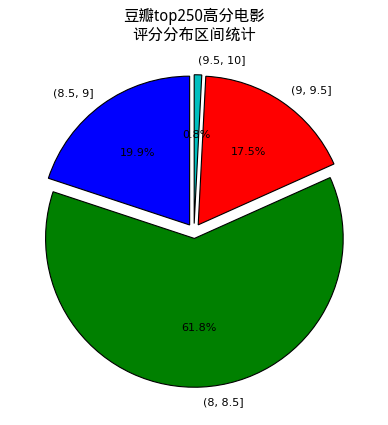

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

names = ['Ranking', 'Title', 'Original_title', 'Other_title', 'Director', 'Stars', 'Year', 'Country', 'Genres', 'Rating', 'Rating_times', 'Inq']
df_movies = pd.read_csv('movie_info_top250.csv', index_col=0, names=names)

ind = pd.cut(df_movies.Rating, bins=[8, 8.5, 9, 9.5, 10])
gb_rates = df_movies.groupby(ind).size()
font = FontProperties(fname='/usr/share/fonts/chinese/wqy-microhei.ttf', size=14)   
plt.figure(figsize=(6, 6), dpi = 80)
plt.axes(aspect = 1)
plt.pie(gb_rates,
        explode = [0.05] * len(gb_rates), 
        labels=ind.value_counts().index,
        shadow = False,
        startangle = 90, 
        pctdistance = 0.6,
       autopct = "%3.1f%%")
plt.title("豆瓣top250高分电影\n评分分布区间统计",  fontproperties=font)
#plt.legend(loc = 'upper right')

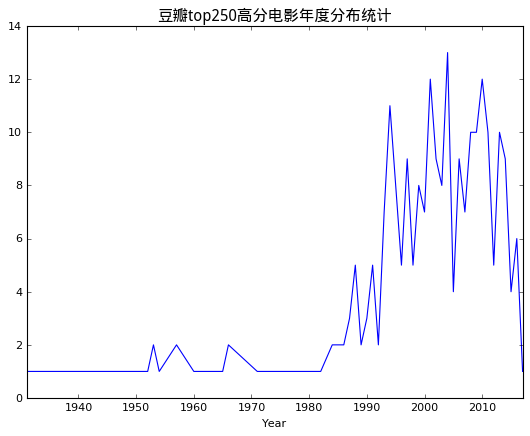

In [4]:
#年度分布统计
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

names = ['Ranking', 'Title', 'Original_title', 'Other_title', 'Director', 'Stars', 'Year', 'Country', 'Genres', 'Rating', 'Rating_times', 'Inq']
df_movies = pd.read_csv('movie_info_top250.csv', index_col=0, names=names)

count_by_year = df_movies.groupby('Year')['Title'].count()
font = FontProperties(fname='/usr/share/fonts/chinese/wqy-microhei.ttf', size=14)
plt.figure(figsize=(8, 6), dpi = 80)
plt.title("豆瓣top250高分电影年度分布统计",  fontproperties=font)

count_by_year.plot()

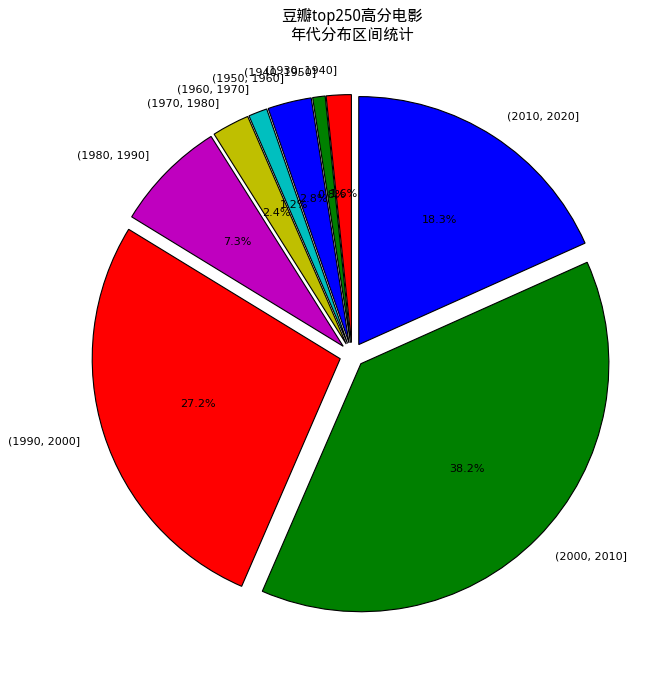

In [5]:
#年代分布统计
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

names = ['Ranking', 'Title', 'Original_title', 'Other_title', 'Director', 'Stars', 'Year', 'Country', 'Genres', 'Rating', 'Rating_times', 'Inq']
df_movies = pd.read_csv('movie_info_top250.csv', index_col=0, names=names)

earliest = df_movies.Year.min()
latest = df_movies.Year.max()
bins = list(range(earliest - earliest % 10, latest - latest % 10 + 20, 10))
ind = pd.cut(df_movies.Year, bins = bins)
decades = df_movies.groupby(ind).Title.count()
font = FontProperties(fname='/usr/share/fonts/chinese/wqy-microhei.ttf', size=14)   
plt.figure(figsize=(10, 10), dpi = 80)
plt.axes(aspect = 1)
plt.pie(decades,
        explode = [0.05] * len(decades), 
        labels=decades.index,
        shadow = False,
        startangle = 90, 
        pctdistance = 0.6,
        colors = 'rgbcym',
       autopct = "%3.1f%%")
plt.title("豆瓣top250高分电影\n年代分布区间统计",  fontproperties=font)

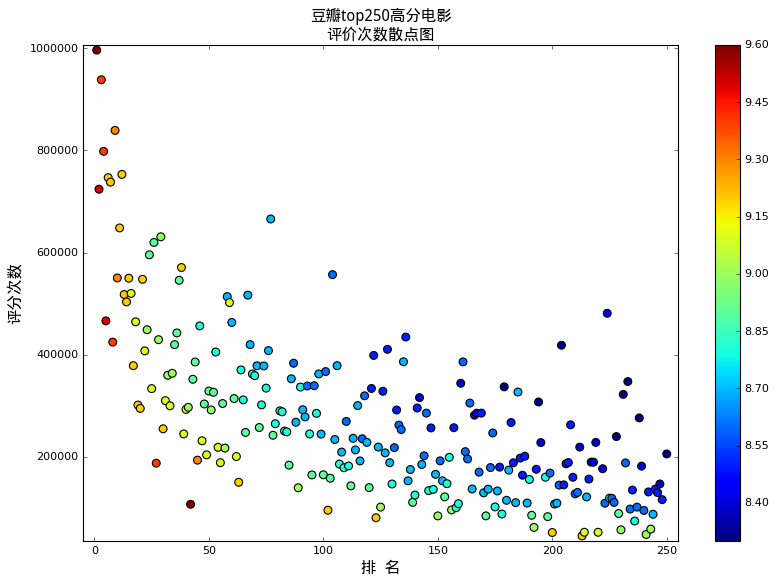

In [6]:
#评价次数统计
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

names = ['Ranking', 'Title', 'Original_title', 'Other_title', 'Director', 'Stars', 'Year', 'Country', 'Genres', 'Rating', 'Rating_times', 'Inq']
df_movies = pd.read_csv('movie_info_top250.csv', index_col=0, names=names)

#df_movies.Rating_times.sort_values(ascending=False)
font = FontProperties(fname='/usr/share/fonts/chinese/wqy-microhei.ttf', size=14)   
plt.figure(figsize=(12, 8), dpi = 80)
#plt.axes(aspect = 1)
plt.scatter(df_movies.index, df_movies.Rating_times, c = df_movies.Rating, s = 50)
plt.xlabel("排  名",  fontproperties=font)
plt.ylabel("评分次数",  fontproperties=font)
plt.xlim(-5, 255)
plt.ylim(df_movies.Rating_times.min() - 10000, df_movies.Rating_times.max()+10000)
plt.colorbar()
plt.title("豆瓣top250高分电影\n评价次数散点图",  fontproperties=font)

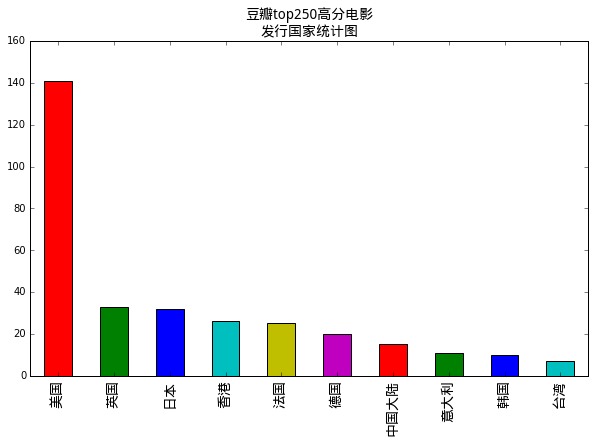

In [7]:
#发行国家统计
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

names = ['Ranking', 'Title', 'Original_title', 'Other_title', 'Director', 'Stars', 'Year', 'Country', 'Genres', 'Rating', 'Rating_times', 'Inq']
df_movies = pd.read_csv('movie_info_top250.csv', index_col=0, names=names)

countries = set.union(*(set(x.split(' ')) for x in df_movies.Country))
df_countries = pd.DataFrame(np.zeros((len(df_movies), len(countries))), columns=countries)
for ix, country in enumerate(df_movies.Country):
    for c in country.split(' '):
        df_countries.loc[ix, c] = 1
df_countries = df_countries.astype(int)
top_10_countries = df_countries.sum().sort_values(ascending=False)[:10]
#plt.figure(figsize=(8, 6), dpi = 100)
plt.title("豆瓣top250高分电影\n发行国家统计图",  fontproperties=font)
plt.xticks(np.arange(10),top_10_countries[:10].index, fontproperties=font)
top_10_countries.plot(kind='bar', color='rgbcym', figsize=(10, 6))

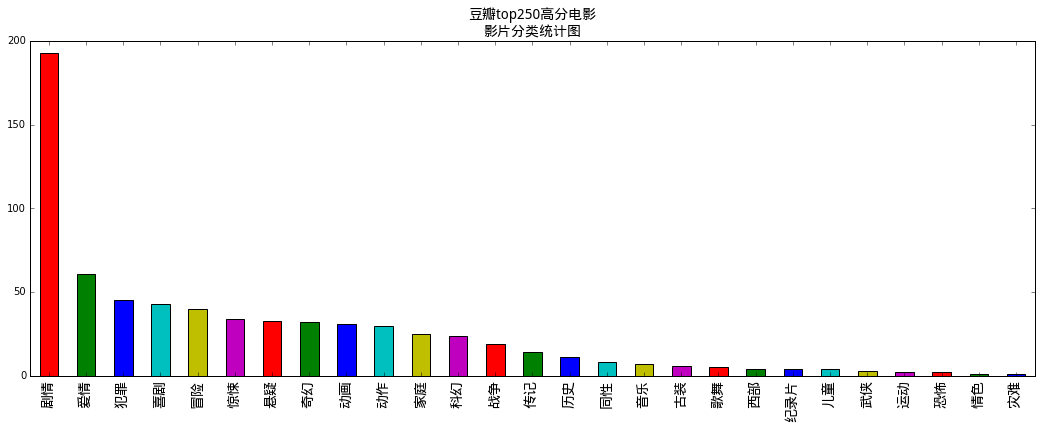

In [17]:
#影片类型统计
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.font_manager import FontProperties

names = ['Ranking', 'Title', 'Original_title', 'Other_title', 'Director', 'Stars', 'Year', 'Country', 'Genres', 'Rating', 'Rating_times', 'Inq']
df_movies = pd.read_csv('movie_info_top250.csv', index_col=0, names=names)

genres = set.union(*(set(x.split(' ')) for x in df_movies.Genres))
df_genres = pd.DataFrame(np.zeros((len(df_movies), len(genres))), columns=genres)
for ix, gen in enumerate(df_movies.Genres):
    for g in gen.split(' '):
        df_genres.loc[ix, g] = 1
#df_genres.sum().plot(kind='bar')

genres_sum = df_genres.sum().sort_values(ascending=False)
font = FontProperties(fname='/usr/share/fonts/chinese/wqy-microhei.ttf', size=14)   
plt.title("豆瓣top250高分电影\n影片分类统计图",  fontproperties=font)
plt.xticks(np.arange(10),genres_sum.index, fontproperties=font)
genres_sum.plot(kind='bar', color='rgbcym', figsize=(18, 6))